In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (5,4)

In [2]:
file_path = 'results/dict/'
file_name = os.listdir(file_path)

In [3]:
clip = 0.04
noise_scale = [1000.0, 100.0, 10.0, 5.0, 1.0, 0.8]
t = [norm.ppf(0.975, loc=0, scale=i*clip) for i in noise_scale]
epsilon = [0.00862, 0.0321, 0.374, 0.802, 6.85, 11.3]

In [4]:
performance_ = []
indx = []
fil = []

## Sigma 100

In [5]:
files = []
for i, file in enumerate(file_name):
    with open('{}{}'.format(file_path,file), 'rb') as f:
        res = pickle.load(f)
        performance_.append(res['test_history_acc'][-1])

In [29]:
from scipy import optimize
r = []
for sig in noise_scale:
    def f(x, sigma=sig, alpha=0.05, clip = 0.04):
        return 2*sigma*clip*np.sqrt(2)/(x*np.sqrt(np.pi))*np.exp((-x**2)/(8*sigma**2*clip**2)) - alpha
    root = optimize.newton(f, 1e-3, maxiter=200)
    r.append(root)

In [30]:
r

[162.44614272963005,
 16.244614272963005,
 1.6244614272963007,
 0.8122307136481499,
 0.16244614272891122,
 0.12995691418370303]

In [7]:
# test_df.income.value_counts()

In [9]:
# clipping = [0.005, 0.0001, 0.005, 0.05, 0.1, 1.0]

In [8]:
def bound(t, clip):
    return 0.1*(2*clip+2*t)/2
# bound = 0.001*(2*1 + 8*1**2*1**2)/2

In [33]:
def new_bound(t, clip):
    return 0.1*(2*clip+t)/2
# bound = 0.001*(2*1 + 8*1**2*1**2)/2

In [34]:
bd = []
for i, n in enumerate(t):
    bd.append(bound(n, 0.04))

In [35]:
new_bd = []
for i, n in enumerate(r):
    new_bd.append(new_bound(n, 0.04))

In [11]:
max_deviation = []
for file in file_name:
    with open('{}{}'.format(file_path,file), 'rb') as f:
        res = pickle.load(f)
        # print(res.keys())
        max_deviation.append(max(res['male_norm'][-1], res['female_norm'][-1]))
        # if res['male'][-1] > best_performance:
        #     best_performance = res['test_history_acc'][-1]
        #     best_performance_index_ns_100 = i
        #     best_file = file

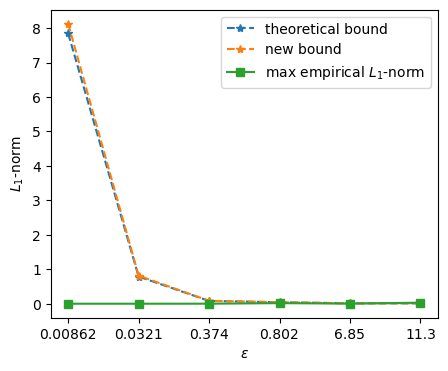

In [36]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)), bd, '--*', label='theoretical bound')
plt.plot(range(len(epsilon)), new_bd, '--*', label='new bound')
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

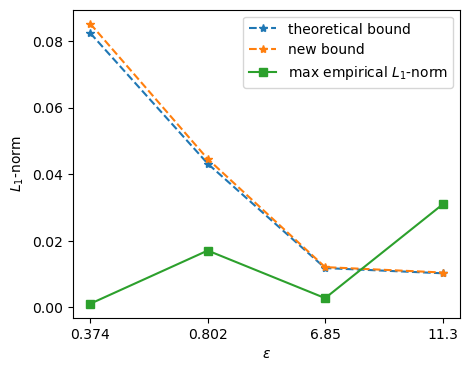

In [37]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)-2), bd[2:], '--*', label='theoretical bound')
plt.plot(range(len(epsilon)-2), new_bd[2:], '--*', label='new bound')
plt.plot(range(len(epsilon)-2), max_deviation[2:], '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)-2), epsilon[2:])
plt.legend()

In [42]:
(0.8067686260057736 + 0.801)/2

0.8038843130028868

In [43]:
performance_ = [0.8031447699772741,
 0.8029605061114182,
 0.8009336035870033,
 0.8028843130028869,
 0.8038843130028868,
 0.8026005773647227]

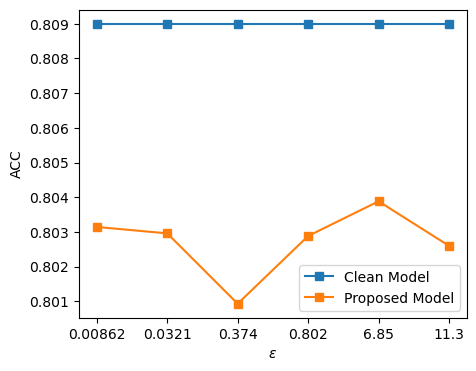

In [44]:
plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.809, '-s', label=r'Clean Model')
plt.plot(range(len(epsilon)), performance_, '-s', label=r'Proposed Model')
plt.ylabel(r'ACC')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

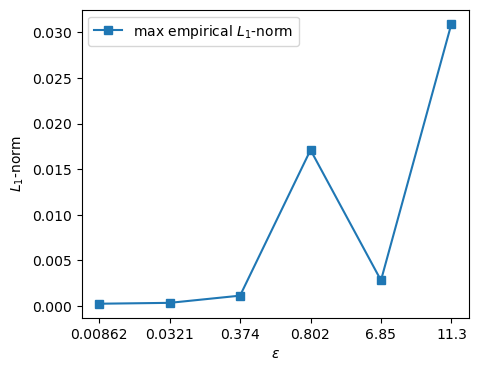

In [21]:
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

In [3]:
with open('results/dict/adult_fair_fold_0_9112022_194819.pkl', 'rb') as f:
    run_fair_dict = pickle.load(f)
with open('results/dict/adult_proposed_fold_0_9112022_195457.pkl', 'rb') as f:
    run_proposed_dict = pickle.load(f)
with open('results/dict/adult_alg1_fold_0_9112022_193928.pkl', 'rb') as f:
    run_alg1_dict = pickle.load(f)

In [4]:
run_fair_dict.keys()

dict_keys(['train_global_history_loss', 'train_male_history_loss', 'train_female_history_loss', 'train_global_history_acc', 'train_male_history_acc', 'train_female_history_acc', 'val_global_history_loss', 'val_male_history_loss', 'val_female_history_loss', 'val_global_history_acc', 'val_male_history_acc', 'val_female_history_acc', 'male_norm', 'female_norm'])

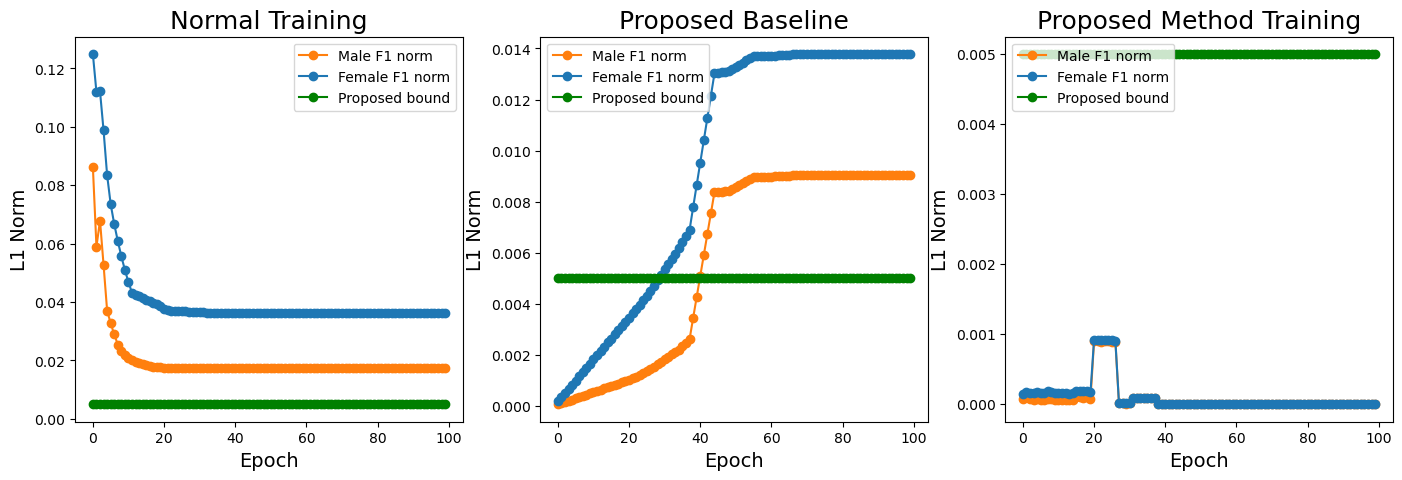

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))

axs[0].plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    np.ones(len(run_fair_dict['female_norm']))*bound,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[0].set_ylabel('L1 Norm', size=14)
axs[0].set_xlabel('Epoch', size=14)
axs[0].set_title(f'Normal Training',size=18)
axs[0].legend()

axs[1].plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    np.ones(len(run_alg1_dict['female_norm']))*bound,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[1].set_ylabel('L1 Norm', size=14)
axs[1].set_xlabel('Epoch', size=14)
axs[1].set_title(f'Proposed Baseline',size=18)
axs[1].legend(loc=2)

axs[2].plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*bound,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[2].set_ylabel('L1 Norm', size=14)
axs[2].set_xlabel('Epoch', size=14)
axs[2].set_title(f'Proposed Method Training',size=18)
axs[2].legend(loc=2)

Text(0, 0.5, 'L1 norm')

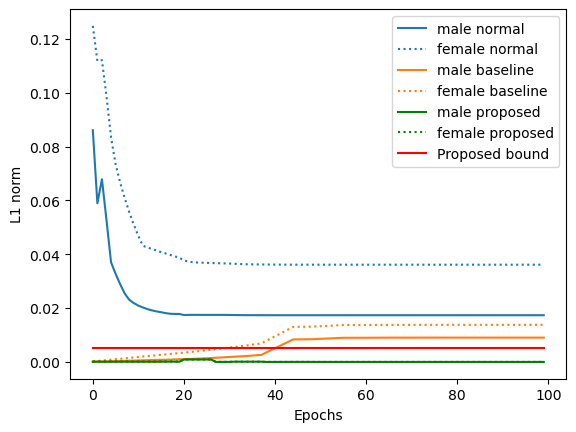

In [17]:
plt.plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-',
    label='male normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    ':',
    label='female normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-',
    label='male baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    ':',
    label='female baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-',
    label='male proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    ':',
    label='female proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*bound,
    '-',
    label='Proposed bound',
    color='red'
)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('L1 norm')

#ff7f0e
# plt.plot(
#     np.arange(len(run_fair_dict['female_norm'])),
#     np.ones(len(run_fair_dict['female_norm']))*bound,
#     '-o',
#     label='Proposed bound',
#     color='green'

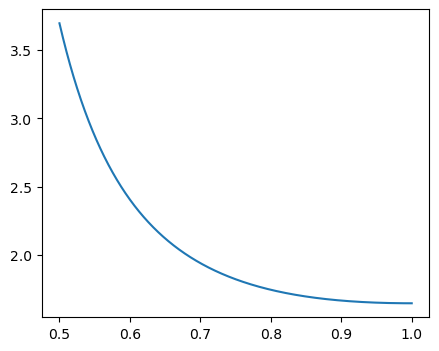

In [38]:
def f(sigma):
    return sigma*np.exp(1/(2*sigma**2))

sig = np.linspace(0.5, 1, 1000)
val = f(sig)
plt.plot(sig, val)